In [1]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/animals.csv')
df

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian
5,Komodo dragon,cold-blooded,scales,no,no,no,yes,no,reptile
6,bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
7,pigeon,warm-blooded,feathers,no,no,yes,yes,no,bird
8,cat,warm-blooded,fur,yes,no,no,yes,no,mammal
9,leopard shark,cold-blooded,scales,yes,yes,no,no,no,fish


In [12]:
x = df.drop(['Name', 'Class Label'], axis=1)
y = df['Class Label']
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature,warm-blooded,cold-blooded,cold-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded
Skin Cover,hair,scales,scales,hair,none,scales,hair,feathers,fur,scales,scales,feathers,quills,scales,none
Gives Birth,yes,no,no,yes,no,no,yes,no,yes,yes,no,no,yes,no,no
Aquatic Creature,no,no,yes,yes,semi,no,no,no,no,yes,semi,semi,no,yes,semi
Aerial Creature,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no
Has Legs,yes,no,no,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,yes
Hibernates,no,yes,no,no,yes,no,yes,no,no,no,no,no,yes,no,yes


In [13]:
x = pd.get_dummies(x)
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature_cold-blooded,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1
Body Temperature_warm-blooded,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0
Skin Cover_feathers,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Skin Cover_fur,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Skin Cover_hair,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Skin Cover_none,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Skin Cover_quills,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Skin Cover_scales,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
Gives Birth_no,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1
Gives Birth_yes,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0


In [14]:
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier()
m.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

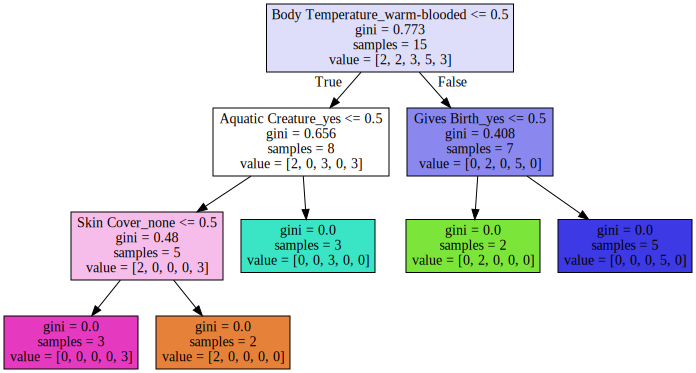

In [15]:
utils.draw_tree(m, x)